# Face detection code

GPIO Initialization Complete


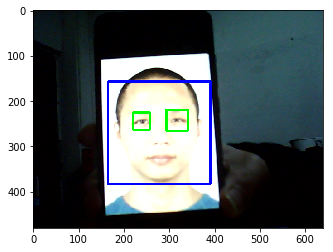

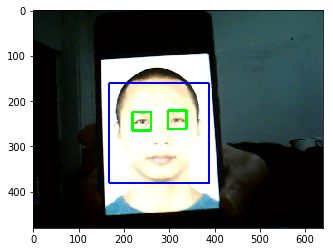

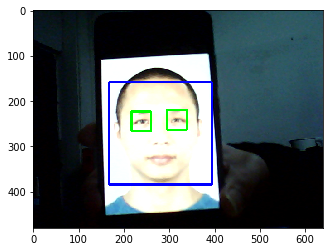

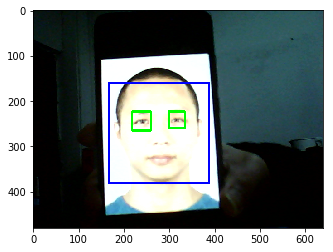

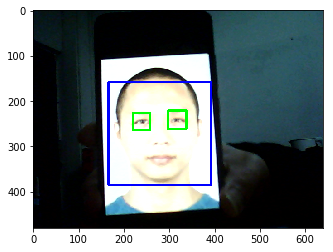

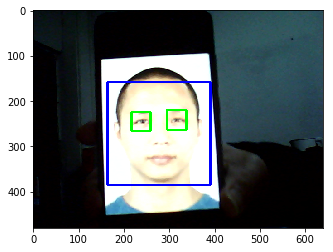

KeyboardInterrupt: 

In [10]:
import cv2
from matplotlib import pyplot as plt  
import numpy as np
from pynq import Overlay
import time

# import GPIO tcl file
overlay=Overlay('./design_1.bit')
overlay?
led = overlay.axi_gpio_1
#close led
led.write(0x00,0)
print("GPIO Initialization Complete")


frame_in_w = 640
frame_in_h = 480
# open the camera
cap = cv2.VideoCapture()
cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w)#set picture width
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h)#set hight
cap.open(0)
while True:
    led.write(0x00,0)
    ret, np_frame = cap.read()
    #import face data
    face_cascade = cv2.CascadeClassifier('data_face.xml')
    #import eye data
    eye_cascade = cv2.CascadeClassifier( 'data_eye.xml')
    # picture thransform to gray
    gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # detect face and eyes
    for (x,y,w,h) in faces:
        cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = np_frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
            #open led
            led.write(0x00,1)

    # print the result picture
    get_ipython().magic('matplotlib inline')
    plt.imshow(np_frame[:,:,[2,1,0]])
    plt.show()
    
# free cam,destroy window
cv2.destroyAllWindows()
cap.release()